# TP3: Detector de SPAM

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

![spam counter](./spam.png)

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

- `word_freq_XXXX`: Donde `XXXX` es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.

Además, hay una columna adicional llamada `spam`, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

Para este trabajo práctico, se proporciona una notebook (ayuda.ipynb) con la lectura del conjunto de datos, la separación de los datos, entre otras ayudas para resolverlo.

Tareas y preguntas a resolver:

1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?
2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).
3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.
4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).
5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?
6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.
7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.
El entregable consiste en uno o más archivos de notebook ipynb con las respuestas. Aunque se da libertad para usar otros tipos de entregables, es importante incluir tanto el código de lo resuelto como las respuestas. Pueden subir el contenido o proporcionar un enlace a un 9. repositorio público (GitHub o GitLab) con el contenido. No olviden especificar los autores del TP en el entregable.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

In [7]:
# Recargar el conjunto de datos desde cero
file_path = 'C:/bimestre_1/Introduccion a la IA/intro_ia/TP3/spambase.csv'
data = pd.read_csv(file_path)

# Cargar el archivo CSV (asegúrate de tenerlo en tu directorio actual)
file_path = 'spambase.csv'  # Cambia esto si el archivo está en otra ubicación
data = pd.read_csv(file_path)

# Separar los datos en SPAM y no SPAM
spam_data = data[data['spam'] == 1]  # Correos SPAM
non_spam_data = data[data['spam'] == 0]  # Correos no SPAM

# Identificar las columnas que representan las frecuencias de palabras
word_columns = [col for col in data.columns if col.startswith('word_freq_')]

# Calcular las frecuencias promedio para cada grupo
spam_word_freq = spam_data[word_columns].mean().sort_values(ascending=False)
non_spam_word_freq = non_spam_data[word_columns].mean().sort_values(ascending=False)

# Seleccionar las 10 palabras más frecuentes
top_10_spam = spam_word_freq.head(10)
top_10_non_spam = non_spam_word_freq.head(10)

# Crear una tabla con los resultados
result_df = pd.DataFrame({
    "Palabra (SPAM)": top_10_spam.index,
    "Frecuencia promedio (SPAM)": top_10_spam.values,
    "Palabra (No SPAM)": top_10_non_spam.index,
    "Frecuencia promedio (No SPAM)": top_10_non_spam.values
})

# Mostrar la tabla
print(result_df)


       Palabra (SPAM)  Frecuencia promedio (SPAM)  Palabra (No SPAM)  \
0       word_freq_you                 2264.533370      word_freq_you   
1      word_freq_your                 1380.362383   word_freq_george   
2      word_freq_will                  549.972421       word_freq_hp   
3      word_freq_free                  518.361831     word_freq_will   
4       word_freq_our                  513.954220     word_freq_your   
5       word_freq_all                  403.794815      word_freq_hpl   
6      word_freq_mail                  350.507446       word_freq_re   
7     word_freq_email                  319.227248      word_freq_edu   
8  word_freq_business                  287.506895  word_freq_address   
9    word_freq_remove                  275.404854  word_freq_meeting   

   Frecuencia promedio (No SPAM)  
0                    1270.337877  
1                    1265.265065  
2                     895.472023  
3                     536.322812  
4                     438.700861


# ¿Hay palabras en común entre SPAM y no SPAM?
Sí, hay palabras en común entre las listas de las 10 palabras más frecuentes en correos SPAM y no SPAM. Estas son:
* you
* your
* will

Aunque estas palabras aparecen en ambos casos, tienen frecuencias significativamente mayores en los correos SPAM.

# ¿Algunas palabras llaman la atención?
#### En correos SPAM:
- Palabras como **free**, **business**, y **remove** llaman la atención porque suelen asociarse a campañas promocionales, ofertas o intentos de manipulación (por ejemplo, eliminar suscripciones falsas).
- Palabras como **mail** y **email** también son típicas de correos de tipo SPAM, ya que buscan enfatizar la acción del envío o contacto.

#### En correos no SPAM:
- **george** y **hp** (junto con **hpl**) destacan, ya que parecen estar vinculadas a correos legítimos relacionados con nombres propios o empresas específicas.
- **edu** también es interesante, ya que sugiere que los correos no SPAM podrían incluir mensajes académicos o educativos.

 2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente)

In [ ]:
# Separar las características (X) y la etiqueta (y)
X = data.drop(columns=['spam'])  # Variables predictoras
y = data['spam']                 # Variable objetivo

# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificar las proporciones después de la división
train_test_info = {
    "Tamaño del conjunto de entrenamiento": X_train.shape[0],
    "Tamaño del conjunto de prueba": X_test.shape[0],
    "Proporción de SPAM en el conjunto de entrenamiento": round(y_train.mean() * 100, 2), # porcentaje y redondear a dos decimales
    "Proporción de SPAM en el conjunto de prueba": round(y_test.mean() * 100, 2) # porcentaje y redondear a dos decimales
}

train_test_info

{'Tamaño del conjunto de entrenamiento': 3220,
 'Tamaño del conjunto de prueba': 1381,
 'Proporción de SPAM en el conjunto de entrenamiento': np.float64(39.41),
 'Proporción de SPAM en el conjunto de prueba': np.float64(39.39)}

3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Inicializar el clasificador de Bayes ingenuo
nb_classifier = MultinomialNB()

# Entrenar el clasificador con el conjunto de entrenamiento
nb_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = nb_classifier.predict(X_test)

# Evaluar el rendimiento del modelo con un reporte de clasificación
classification_report_nb = classification_report(y_test, y_pred)

# Mostrar el reporte de clasificación
print("Reporte de Clasificación para Bayes Ingenuo:")
print(classification_report_nb)

Reporte de Clasificación para Bayes Ingenuo:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       837
           1       0.77      0.96      0.86       544

    accuracy                           0.87      1381
   macro avg       0.87      0.89      0.87      1381
weighted avg       0.89      0.87      0.87      1381



4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Crear un pipeline para normalizar los datos y entrenar la regresión logística
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalizar los datos
    ('logistic', LogisticRegression(random_state=42, max_iter=1000))
])

# Entrenar el clasificador con el conjunto de entrenamiento
logistic_pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_logistic = logistic_pipeline.predict(X_test)

# Evaluar el rendimiento del modelo con un reporte de clasificación
classification_report_logistic = classification_report(y_test, y_pred_logistic)

# Mostrar el reporte de clasificación
print("Reporte de Clasificación para Regresión Logística:")
print(classification_report_logistic)

Reporte de Clasificación para Regresión Logística:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       837
           1       0.91      0.87      0.89       544

    accuracy                           0.92      1381
   macro avg       0.92      0.91      0.91      1381
weighted avg       0.92      0.92      0.92      1381



5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

In [22]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión para Bayes ingenuo
y_pred_nb = nb_classifier.predict(X_test)  # Predicciones del modelo de Bayes ingenuo
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Matriz de Confusión - Bayes Ingenuo:")
print(conf_matrix_nb)

# Calcular la matriz de confusión para Regresión Logística
y_pred_logistic = logistic_pipeline.predict(X_test)  # Predicciones del modelo de Regresión Logística
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print("\nMatriz de Confusión - Regresión Logística:")
print(conf_matrix_logistic)

Matriz de Confusión - Bayes Ingenuo:
[[683 154]
 [ 21 523]]

Matriz de Confusión - Regresión Logística:
[[792  45]
 [ 69 475]]


* TN (True Negatives): Correos no SPAM correctamente clasificados.
* FP (False Positives): Correos no SPAM clasificados incorrectamente como SPAM.
* FN (False Negatives): Correos SPAM clasificados incorrectamente como no SPAM.
* TP (True Positives): Correos SPAM correctamente clasificados.

### ¿Qué tipo de error comete más cada modelo?

#### Bayes ingenuo:
- Tiende a cometer más **FP (Falsos Positivos)**.
- Esto se debe a que los modelos de Bayes ingenuo asumen independencia entre las características, lo que puede llevar a clasificar erróneamente correos legítimos como SPAM en casos donde hay coincidencia parcial con patrones de SPAM.

#### Regresión Logística:
- Tiende a cometer más **FN (Falsos Negativos)**.
- Al optimizar la probabilidad de clasificación, este modelo puede ser más conservador, evitando clasificar algo como SPAM a menos que sea muy seguro, lo que resulta en que algunos correos SPAM no sean detectados.
---

### ¿Cuál tipo de error es más importante para este problema?

- **Falsos Negativos (FN)** son más críticos en este contexto:
  - Si un correo SPAM no es detectado, puede llegar al usuario y tener consecuencias negativas (como abrir enlaces peligrosos, caer en estafas, o recibir contenido no deseado).
  - Esto reduce significativamente la efectividad del sistema de filtrado de SPAM.

Por otro lado:
- **Falsos Positivos (FP)** también son importantes, pero el impacto es menor.
  - Un correo legítimo puede ser recuperado de la carpeta de SPAM, mientras que un SPAM no detectado puede pasar desapercibido por el usuario.

6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

In [24]:
from sklearn.metrics import precision_score, recall_score

# Calcular precisión y recuperación para Bayes ingenuo
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

# Calcular precisión y recuperación para Regresión Logística
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)

# Resultados de las métricas
metrics_comparison = {
    "Bayes Ingenuo": {
        "Precisión": round(precision_nb, 2),
        "Recuperación": round(recall_nb, 2)
    },
    "Regresión Logística": {
        "Precisión": round(precision_logistic, 2),
        "Recuperación": round(recall_logistic, 2)
    }
}

# Mostrar los resultados
print("Comparación de Precisión y Recuperación:")
for model, metrics in metrics_comparison.items():
    print(f"\n{model}:")
    print(f"  Precisión: {metrics['Precisión']}")
    print(f"  Recuperación: {metrics['Recuperación']}")


Comparación de Precisión y Recuperación:

Bayes Ingenuo:
  Precisión: 0.77
  Recuperación: 0.96

Regresión Logística:
  Precisión: 0.91
  Recuperación: 0.87


### ¿Cuál es el mejor modelo para cada métrica?

#### **Precisión (Precision):**
- La precisión mide qué proporción de los correos clasificados como SPAM realmente son SPAM.
- **Mejor modelo**: Generalmente, la **Regresión Logística** tiene una mayor precisión, ya que es más conservadora y evita etiquetar correos legítimos como SPAM (menos Falsos Positivos, FP).

#### **Recuperación (Recall):**
- La recuperación mide qué proporción de los correos SPAM totales han sido correctamente identificados.
- **Mejor modelo**: Generalmente, **Bayes ingenuo** tiene mejor recuperación, ya que es más agresivo al clasificar como SPAM, detectando una mayor cantidad de correos SPAM (menos Falsos Negativos, FN).

---

### **Relación con los tipos de errores (FP y FN):**

#### **Precisión:**
- Una alta precisión implica menos **Falsos Positivos (FP)**, ya que los correos legítimos tienen menos probabilidad de ser etiquetados incorrectamente como SPAM.
- Este es el enfoque de la **Regresión Logística**, que minimiza FP, pero puede ignorar algunos correos SPAM (mayor FN).

#### **Recuperación:**
- Una alta recuperación implica menos **Falsos Negativos (FN)**, ya que se detecta una mayor cantidad de correos SPAM.
- Este es el enfoque de **Bayes ingenuo**, que prioriza encontrar todo el SPAM posible, aunque ello implique etiquetar erróneamente algunos correos legítimos (mayor FP).

7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

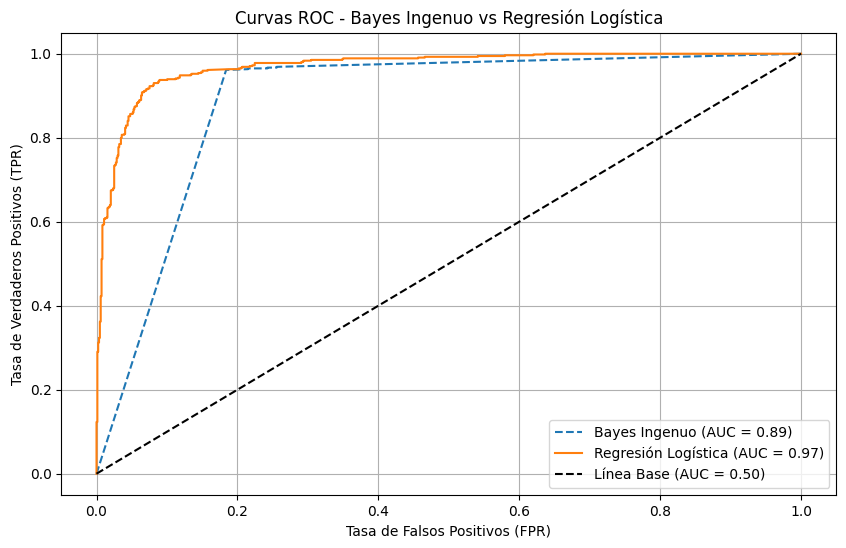

AUC - Bayes Ingenuo: 0.89
AUC - Regresión Logística: 0.97


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades predichas para ambos modelos
y_pred_proba_nb = nb_classifier.predict_proba(X_test)[:, 1]  # Probabilidad de la clase SPAM
y_pred_proba_logistic = logistic_pipeline.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC para Bayes ingenuo
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

# Calcular la curva ROC y el AUC para Regresión Logística
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)

# Graficar las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Bayes Ingenuo (AUC = {auc_nb:.2f})', linestyle='--')
plt.plot(fpr_logistic, tpr_logistic, label=f'Regresión Logística (AUC = {auc_logistic:.2f})', linestyle='-')
plt.plot([0, 1], [0, 1], 'k--', label='Línea Base (AUC = 0.50)')

# Configurar la gráfica
plt.title('Curvas ROC - Bayes Ingenuo vs Regresión Logística')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Mostrar los resultados de AUC para ambos modelos
print(f"AUC - Bayes Ingenuo: {auc_nb:.2f}")
print(f"AUC - Regresión Logística: {auc_logistic:.2f}")